In [17]:
import sys
sys.path.append('/zfsauton3/home/bparia/hf_moe')

import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

In [19]:
with open('../logs/m5/hid_42_emb_8_timear/run_1/decomposed.pkl', 'rb') as fin:
    decomposed_outputs = pickle.load(fin)

with open('../logs/m5/hid_42_emb_8_timear/run_1/val.pkl', 'rb') as fin:
    pred_val = pickle.load(fin)

with open(f'../data/m5/data.pkl', 'rb') as fin:
    tree, ts_data, _ = pickle.load(fin)

In [4]:
val_dec = decomposed_outputs[0]

ars = []
gls = []
ews = []

for ar, gl, ew in val_dec:
    ars.append(ar)
    gls.append(gl)
    ews.append(ew)

ars = np.concatenate(ars, axis=0)
gls = np.concatenate(gls, axis=0)
ews = np.concatenate(ews, axis=0)

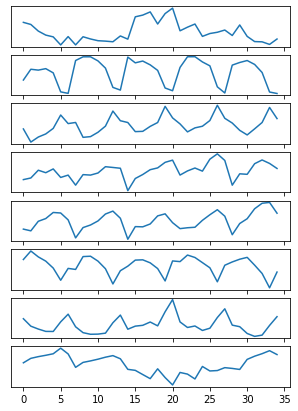

In [54]:
fig = plt.figure(figsize=(5, 7))

num_basis = ews.shape[1]

for i in range(num_basis):
    ax = fig.add_subplot(num_basis, 1, i+1)
    ax.plot(ews[:, i])
    ax.set_yticks([])
    if i < num_basis - 1:
        ax.set_xticklabels([])

plt.savefig('plots/m5_basis.png', dpi=300)

0
1
1837
143


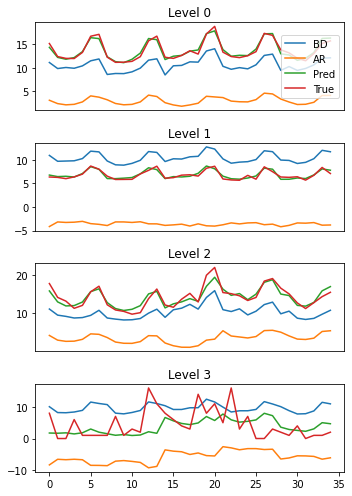

In [70]:
ids = [0, 1, 1837, 143]
fig = plt.figure(figsize=(5, 7))
for level in range(4):
    # idx = np.random.choice(tree.levels[level])
    idx=ids[level]
    print(idx)

    y_pred, y_true = pred_val
    ax = fig.add_subplot(4, 1, level+1)
    
    ax.plot(gls[:, idx], label='BD')
    ax.plot(ars[:, idx], label='AR')
    ax.plot(y_pred[:, idx], label='Pred')
    ax.plot(y_true[:, idx], label='True')
    if level < 3:
        ax.set_xticks([])
    if level==0:
        ax.legend(loc='center right')
    ax.set_title(f'Level {level}')

plt.tight_layout()
plt.savefig(f'plots/ts_plots.png', dpi=300)